# A Jukebox do Torres

This dataset constains all songs on my main spotify playlist called "A Jukebox do Torres" (Torres' Jukebox). This was extracted by connecting to the Spotify API. The code used can be found on GetPlaylistContent.ipynb on this folder.

This is an Exploratory Analysis trying to chracterize the playlist and its contents.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
sns.set(rc={'figure.figsize':(14,12)})


As mentioned before, the information was extracted in another file and saved in PlaylistTracks.parquet

In [49]:
playlist_data = pd.read_parquet('PlaylistTracks.parquet')

In [50]:
playlist_data.head(2)

,name,artist_name,album_name,album_date,album_popularity,track_duration,danceability,energy,instrumentalness,liveness,tempo,artist_url,date_added,album_year,track_duration_secs
0,Panteão,Linda Martini,Turbo Lento,2013-01-01,24,00:04:12,0.352,0.911,0.647,0.503,158.025,https://open.spotify.com/artist/4Pv6qAkea25i2D...,2013-10-06,2013,252
1,purr,Tides From Nebula,Aura,2009-01-01,0,00:04:19,0.115,0.646,0.957,0.367,167.241,https://open.spotify.com/artist/1CzKORB9IN0EjP...,2013-10-06,2009,259


In [51]:
playlist_data.describe()

,album_popularity,danceability,energy,instrumentalness,liveness,tempo,album_year,track_duration_secs
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,24.463968,0.455531,0.770469,0.152220,0.206033,130.733949,2012.440486,234.421862
std,24.088659,0.153727,0.192913,0.278261,0.150229,30.398211,7.029135,72.532345
min,0.000000,0.069200,0.050100,0.000000,0.022000,44.611000,1967.000000,78.000000
25%,0.000000,0.353000,0.666500,0.000029,0.101000,107.224000,2010.000000,187.000000
50%,22.000000,0.456000,0.826000,0.003140,0.144000,131.866000,2014.000000,223.000000
75%,45.000000,0.552000,0.925000,0.129000,0.289000,153.282500,2017.000000,264.000000
max,83.000000,0.956000,0.997000,0.971000,0.941000,206.863000,2022.000000,741.000000


In [52]:
playlist_data.isna().sum()

name                   0
artist_name            0
album_name             0
album_date             0
album_popularity       0
track_duration         0
danceability           0
energy                 0
instrumentalness       0
liveness               0
tempo                  0
artist_url             0
date_added             0
album_year             0
track_duration_secs    0
dtype: int64

### How many songs are in the playlist?

In [53]:
playlist_data['name'].count()

1235

### How many artists are in the playlist?

In [54]:
playlist_data['artist_name'].nunique()

723

### How many albums are in the playlist?

In [55]:
playlist_data['album_name'].nunique()

1003

### Which are the most represented artists?

By number of songs

In [56]:
artist_songs_aggregated = playlist_data[['artist_name','name']].groupby('artist_name').agg({'name':'count'})

In [57]:
artist_songs_aggregated_top_10 = artist_songs_aggregated.sort_values(by='name', ascending=False).head(10).reset_index()

Text(0.5, 0, 'Number of Songs')

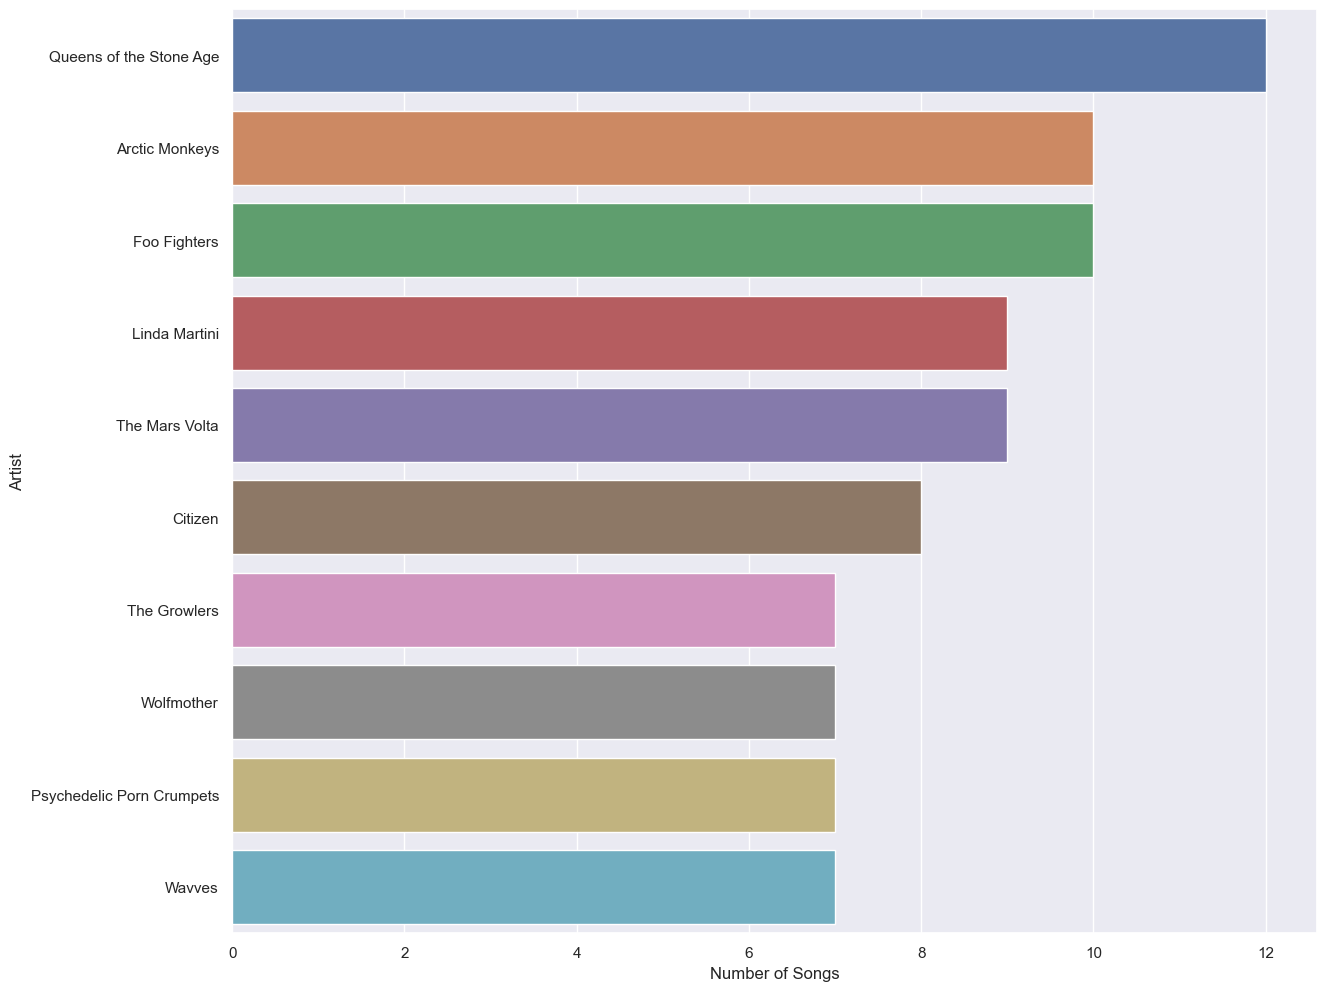

In [58]:
top10_artists_by_songs = sns.barplot(data=artist_songs_aggregated_top_10, x='name',y='artist_name')
top10_artists_by_songs.set_ylabel('Artist')
top10_artists_by_songs.set_xlabel('Number of Songs')

No surprises here, I'm a rock fan

By number of albums

In [59]:
artist_albums_aggregated = playlist_data[['artist_name','album_name']].groupby('artist_name').agg({'album_name':'nunique'})

In [60]:
artist_albums_aggregated_top_10 = artist_albums_aggregated.sort_values(by='album_name', ascending=False).head(10).reset_index()

Text(0.5, 0, 'Number of Albums')

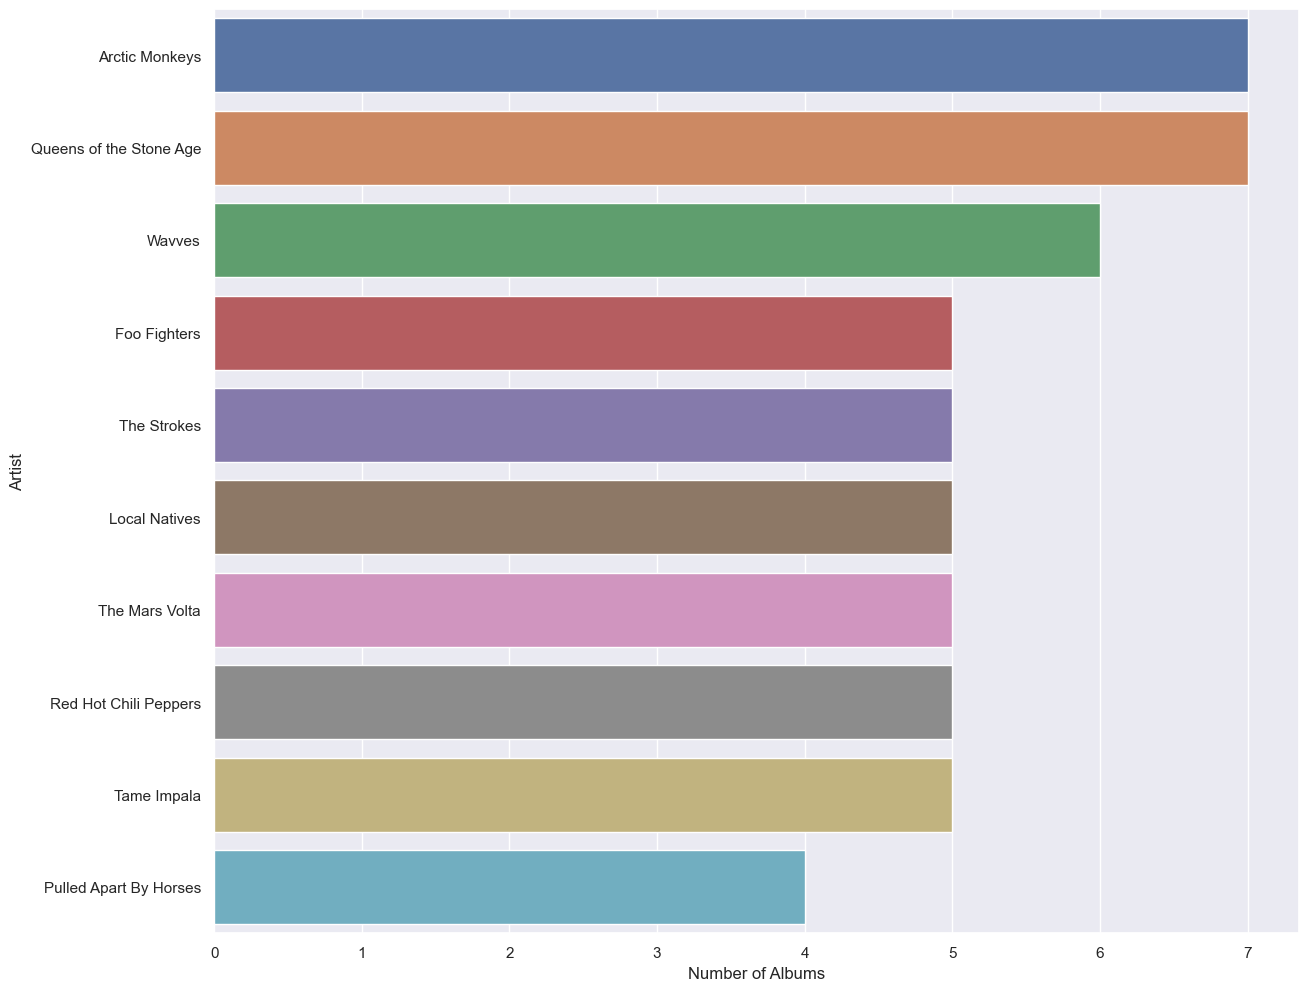

In [61]:
top10_artists_by_albums = sns.barplot(data=artist_albums_aggregated_top_10, x='album_name',y='artist_name')
top10_artists_by_albums.set_ylabel('Artist')
top10_artists_by_albums.set_xlabel('Number of Albums')

Quite surprising to see that Arctic Monkeys and Queens of the Stone Age are so up there. Although these are bands I really like, I thought I was more focused on only one or two albums.

By number of minutes

In [62]:
artist_minutes_aggregated = playlist_data[['artist_name','track_duration_secs']].groupby('artist_name').agg({'track_duration_secs':'sum'})

In [63]:
artist_minutes_aggregated_top_10 = artist_minutes_aggregated.sort_values(by='track_duration_secs', ascending=False).head(10).reset_index()

Text(0.5, 0, 'Total Amount of Minutes')

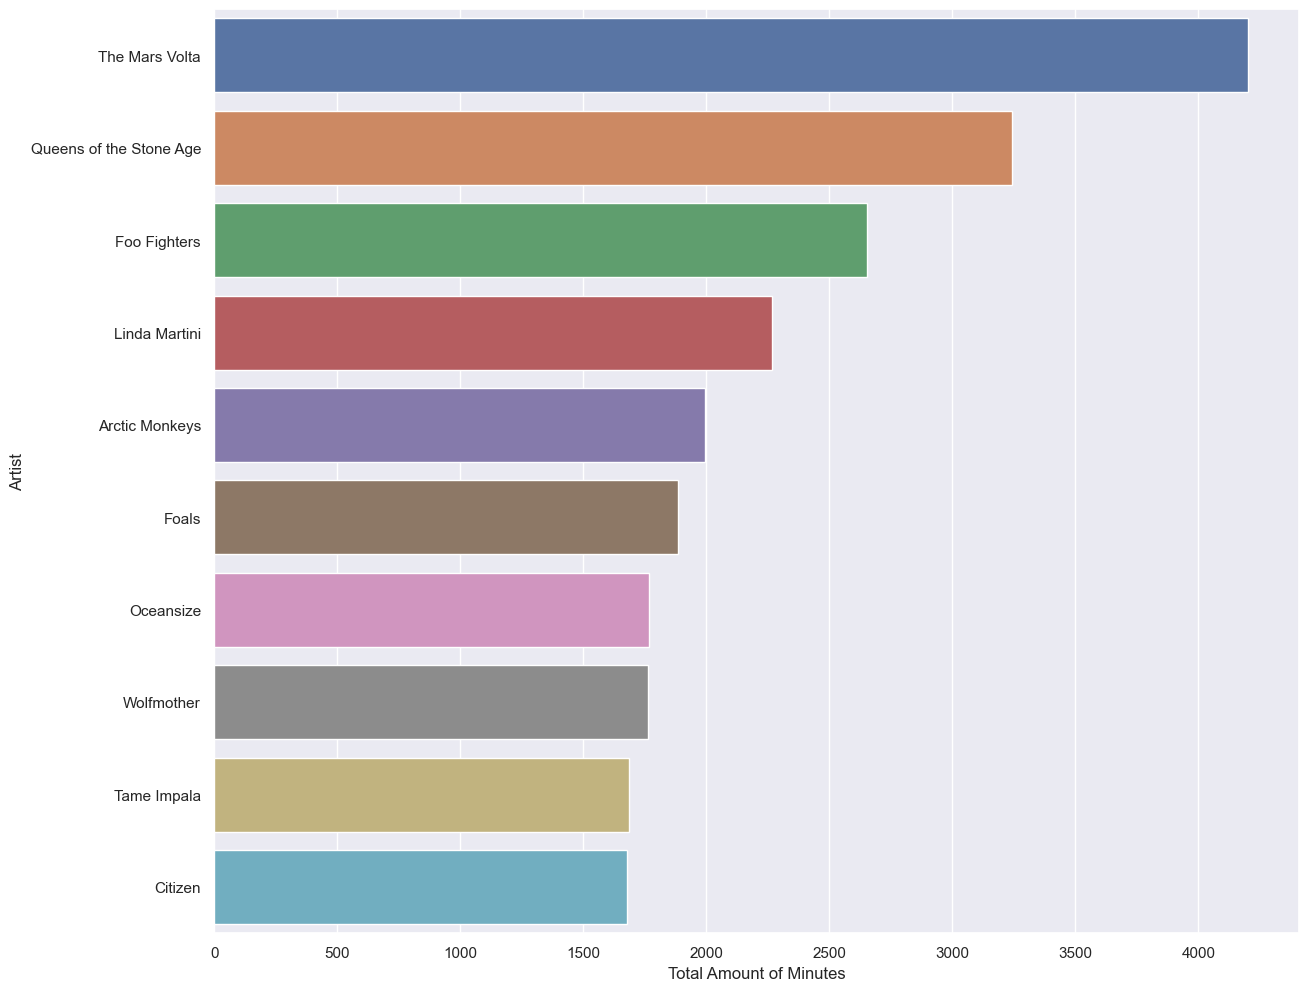

In [64]:
top10_artists_by_minutes = sns.barplot(data=artist_minutes_aggregated_top_10, y='artist_name',x='track_duration_secs')
top10_artists_by_minutes.set_ylabel('Artist')
top10_artists_by_minutes.set_xlabel('Total Amount of Minutes')

The Mars Volta songs are quite lengthy...

### How were the songs added throughout time?

In [65]:
playlist_data['year_added'] = playlist_data['date_added'].dt.year

In [66]:
year_added_songs_aggregated = playlist_data[['year_added','name']].groupby('year_added').agg({'name':'count'}).reset_index()

Text(0, 0.5, 'Total Amount of Songs Added')

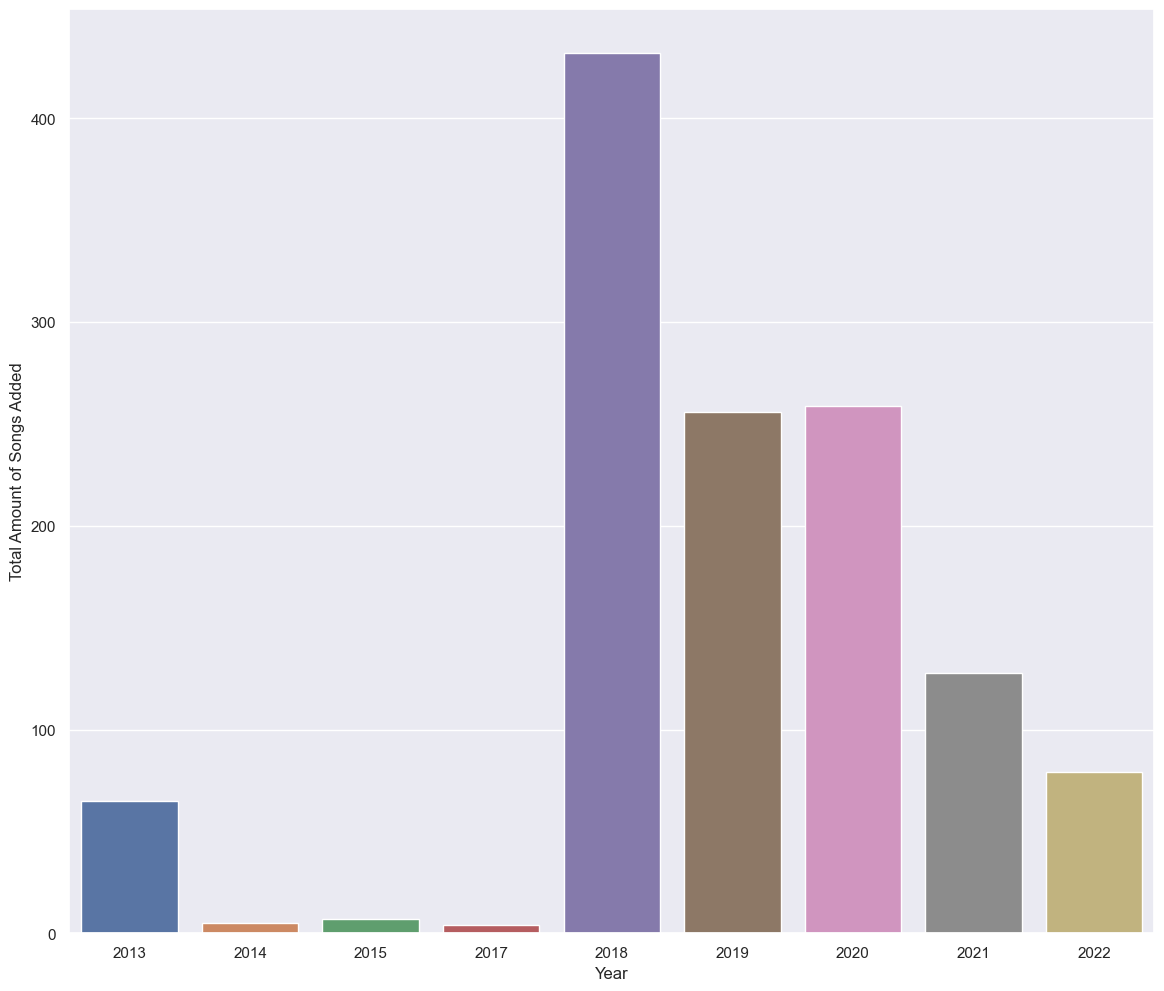

In [67]:
year_added_songs_aggregated_plot = sns.barplot(data=year_added_songs_aggregated, x='year_added', y='name')
year_added_songs_aggregated_plot.set_xlabel('Year')
year_added_songs_aggregated_plot.set_ylabel('Total Amount of Songs Added')

Although this seems odd, there's an explanation for this. Despite having created the playlist in 2013, it was only in 2018 that I have decided to group several of my playlists into this one, hence the boom in additions in 2018.

### Which years are the songs from?

In [68]:
year_album_songs_aggregated = playlist_data[['album_year','name']].groupby('album_year').agg({'name':'count'}).reset_index()

[Text(0, 0, '1967'),
 Text(1, 0, '1968'),
 Text(2, 0, '1969'),
 Text(3, 0, '1970'),
 Text(4, 0, '1971'),
 Text(5, 0, '1972'),
 Text(6, 0, '1988'),
 Text(7, 0, '1989'),
 Text(8, 0, '1991'),
 Text(9, 0, '1992'),
 Text(10, 0, '1993'),
 Text(11, 0, '1994'),
 Text(12, 0, '1995'),
 Text(13, 0, '1996'),
 Text(14, 0, '1997'),
 Text(15, 0, '1998'),
 Text(16, 0, '1999'),
 Text(17, 0, '2000'),
 Text(18, 0, '2001'),
 Text(19, 0, '2002'),
 Text(20, 0, '2003'),
 Text(21, 0, '2004'),
 Text(22, 0, '2005'),
 Text(23, 0, '2006'),
 Text(24, 0, '2007'),
 Text(25, 0, '2008'),
 Text(26, 0, '2009'),
 Text(27, 0, '2010'),
 Text(28, 0, '2011'),
 Text(29, 0, '2012'),
 Text(30, 0, '2013'),
 Text(31, 0, '2014'),
 Text(32, 0, '2015'),
 Text(33, 0, '2016'),
 Text(34, 0, '2017'),
 Text(35, 0, '2018'),
 Text(36, 0, '2019'),
 Text(37, 0, '2020'),
 Text(38, 0, '2021'),
 Text(39, 0, '2022')]

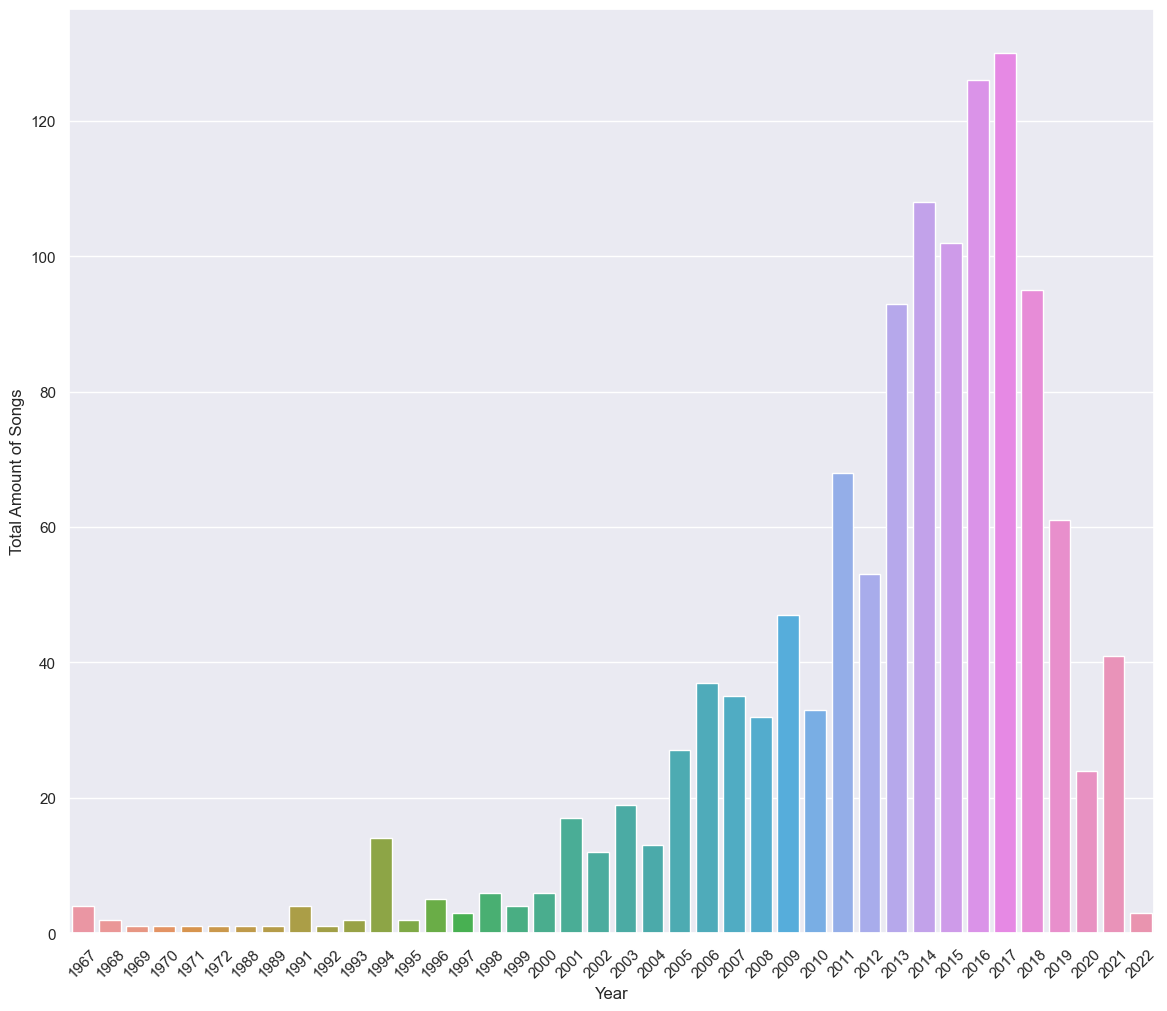

In [69]:
year_album_songs_aggregated_plot = sns.barplot(data=year_album_songs_aggregated, x='album_year', y='name')
year_album_songs_aggregated_plot.set_xlabel('Year')
year_album_songs_aggregated_plot.set_ylabel('Total Amount of Songs')
year_album_songs_aggregated_plot.set_xticklabels(year_album_songs_aggregated_plot.get_xticklabels(),rotation = 45)

### How are the songs features distributed?

Features will be separated due to the huge difference in magnitude which would render the boxplots for small features useless

Small features (in the range of [0,1])

In [70]:
playlist_data_small_features = playlist_data[['danceability','energy','liveness','instrumentalness']]
playlist_data_small_features_melt = pd.melt(playlist_data_small_features, id_vars=[], var_name=['feature'])

<AxesSubplot: xlabel='feature', ylabel='value'>

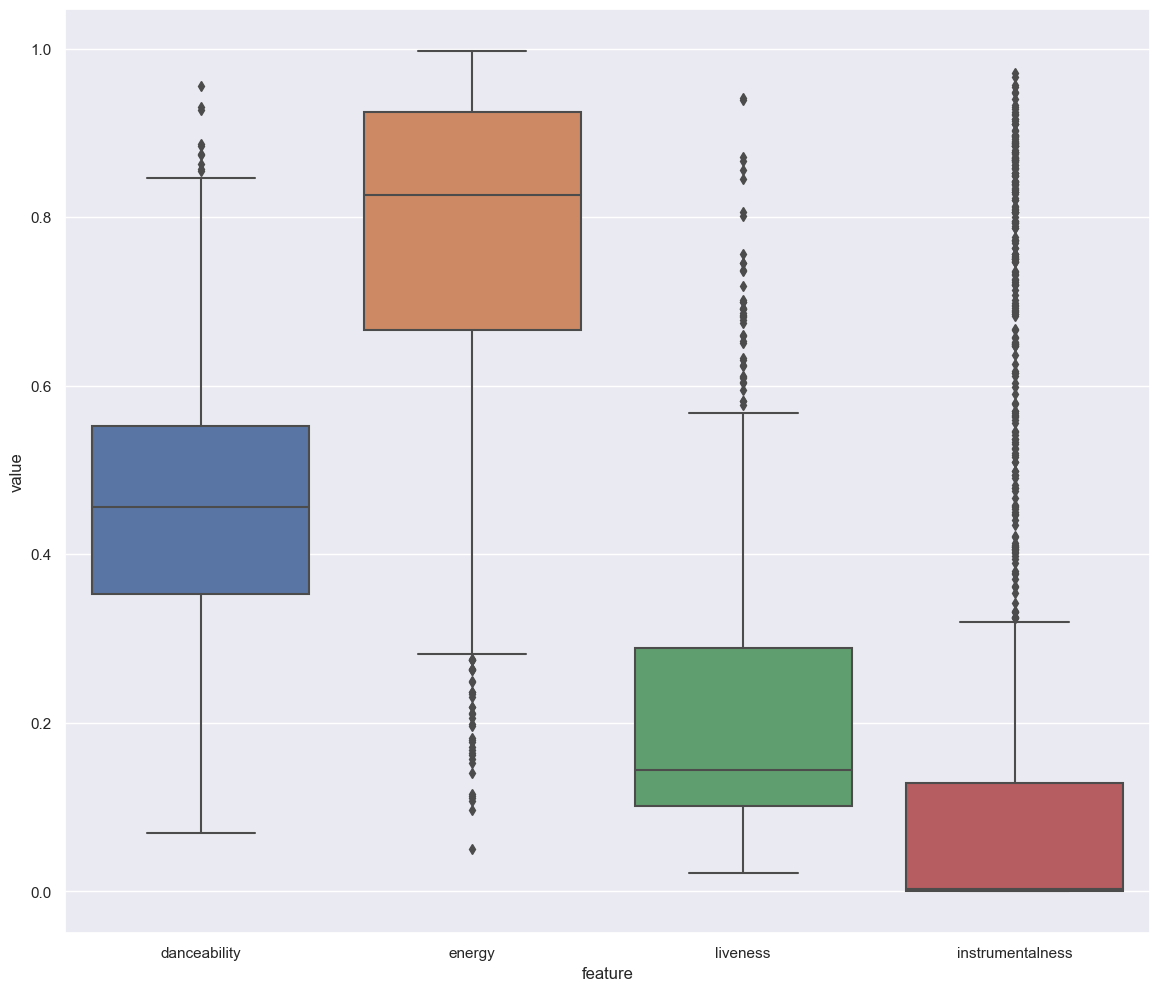

In [71]:
sns.boxplot(data=playlist_data_small_features_melt, x='feature', y='value')

Several insights can be extracted by this plot:  

There are a lot of outliers. This is probably due to have several songs which genres are not represented well on the playlist. E.g.: there are several post-rock songs on the playlist, which are lower in energy and higher in instrumentalness that the majority of the playlist, which is more focused on rock. 

Since Instrumentalness is function of how much of a song does not have vocals, the presence of so many outliers might be a result of having several different song duretions. While most of them follow a typical structure, lenghtier songs might have more instrumental sections and solos, becoming outliers in this category.  


Big features (features in the range of 100s)

In [72]:
playlist_data_big_features = playlist_data[['tempo','track_duration_secs']]
playlist_data_big_features_melt = pd.melt(playlist_data_big_features, id_vars=[], var_name=['feature'])

<AxesSubplot: xlabel='feature', ylabel='value'>

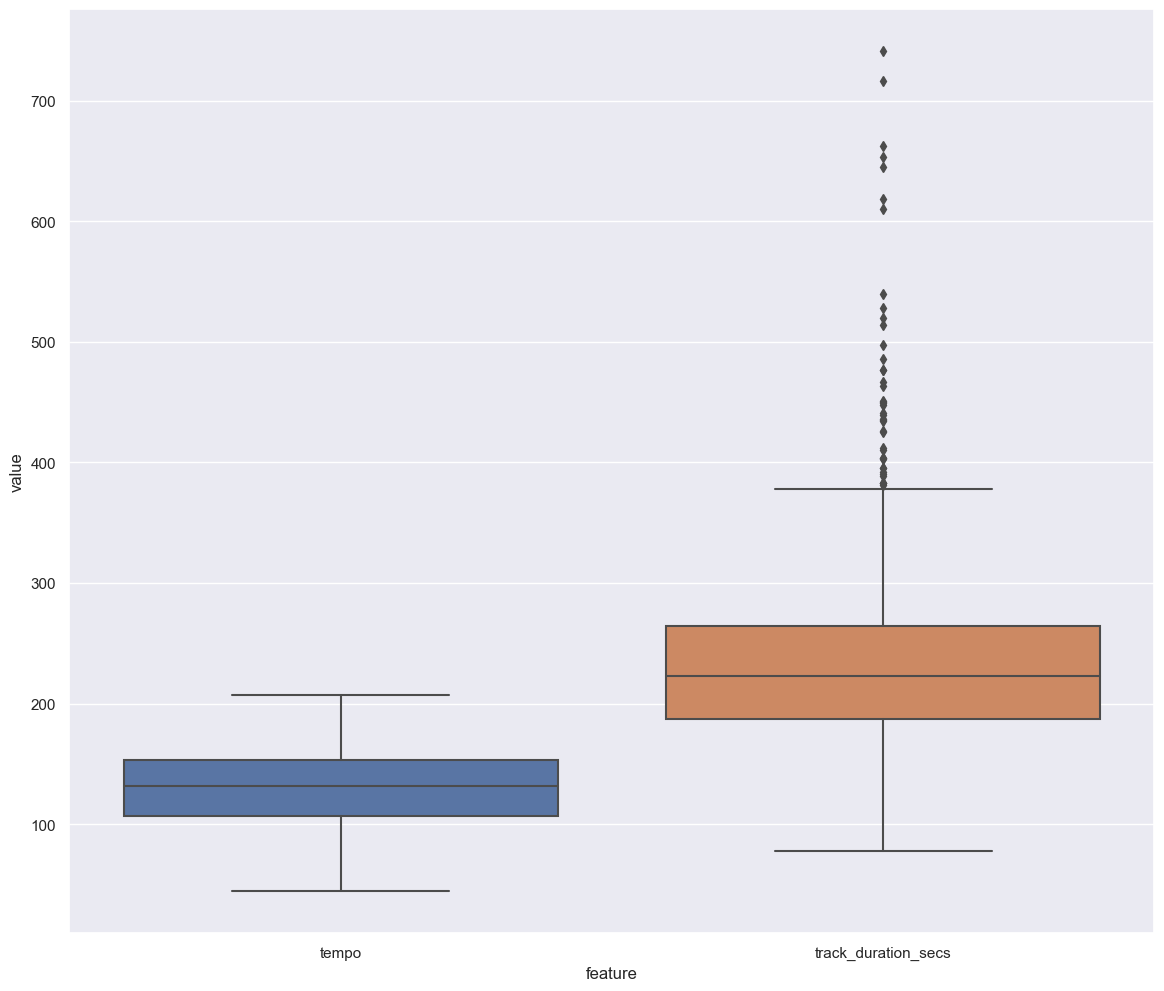

In [73]:
sns.boxplot(data=playlist_data_big_features_melt, x='feature', y='value')

Is there any correlation between song features?

In [75]:
song_features_corr = playlist_data[['danceability','energy','instrumentalness','liveness','tempo','track_duration_secs']]

<AxesSubplot: >

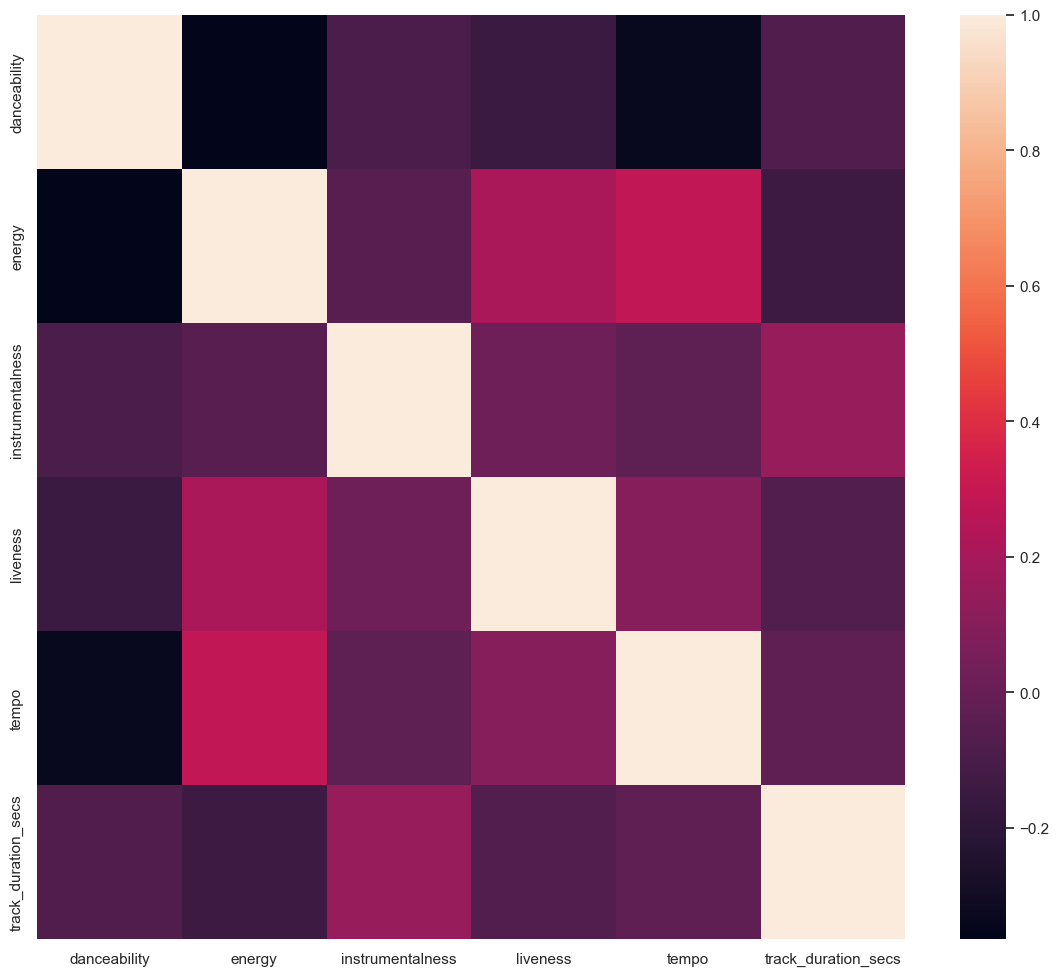

In [77]:
sns.heatmap(song_features_corr.corr())

Is there any way to group similar songs in the playlist? What do those groups look like?

Let's try to cluster the playlist songs in different groups and see what are the characteristics of one of them.

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [88]:
x = playlist_data[['danceability','energy','instrumentalness','liveness','tempo','track_duration_secs']].values

In [89]:
wcss = []

In [90]:
for i in range(1,11,1):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

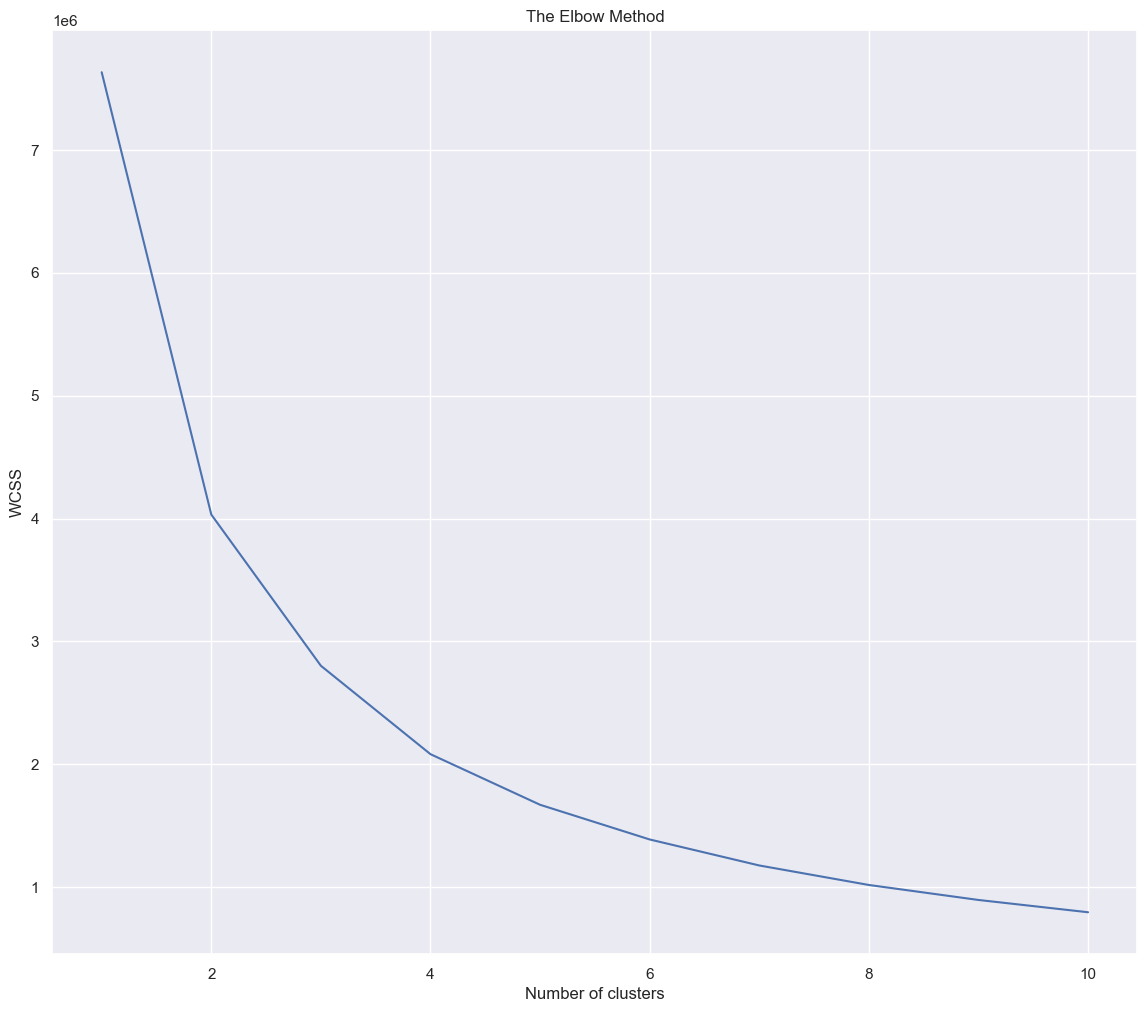

In [91]:
plt.plot(range(1,11,1),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [92]:
kmeans = KMeans(n_clusters = 4, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [93]:
playlist_data['cluster'] = y_kmeans

In [95]:
playlist_data.groupby('cluster')['danceability','energy','instrumentalness','liveness','tempo','track_duration_secs'].agg({np.mean, 'min','max'
})

C:\Users\Hugo\AppData\Local\Temp\ipykernel_8888\3020785834.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  playlist_data.groupby('cluster')['danceability','energy','instrumentalness','liveness','tempo','track_duration_secs'].agg({np.mean, 'min','max'


danceability                   energy                    \
                 max      mean     min    max      mean     min   
cluster                                                           
0              0.956  0.472901  0.0692  0.996  0.764282  0.1110   
1              0.931  0.447655  0.0721  0.997  0.814329  0.0965   
2              0.778  0.359929  0.1020  0.995  0.726179  0.1990   
3              0.927  0.437617  0.1060  0.985  0.714453  0.0501   

        instrumentalness                liveness                      tempo  \
                     max      mean  min      max      mean     min      max   
cluster                                                                       
0                  0.967  0.151450  0.0    0.941  0.201173  0.0220  206.863   
1                  0.971  0.111221  0.0    0.867  0.224952  0.0397  206.055   
2                  0.889  0.226812  0.0    0.692  0.209968  0.0364  191.293   
3                  0.949  0.216898  0.0    0.856  0.184534  0.0290  198.801   

                            track_duration_secs                   
               mean     min                 max        mean  min  
cluster                                                           
0        128.644591  44.611                 275  233.076655  199  
1        134.481221  61.625                 206  169.129032   78  
2        129.057607  76.639                 741  516.000000  425  
3        129.586465  60.497                 412  317.904348  276